# CLASE 1.3: OPERACIONES DE AGREGACIÓN
---
## El concepto de broadcasting.
El término broadcasting hace referencia a la forma en la cual **Numpy** opera con arreglos cuyas dimensiones no empatan, siempre que tales operaciones sean componente a componente, como es el caso de las operaciones algebraicas vistas en la subsección anterior. En términos sencillos, cuando se realiza una operación algebraica entre dos arreglos, si éstos no tienen las mismas dimensiones, **Numpy** intentará hacerlas calzar estirando y/o modificando tras bambalinas la geometría del arreglo más pequeño, a fin de que la operación tenga sentido. Estas modificaciones estructurales son hechas por **Numpy** sin que nosotros intervengamos en las mismas, y siguen un conjunto sencillo de pautas que colectivamente se conocen como **reglas de broadcasting**.

En términos un poco más rigurosos, el **proceso de broadcasting** provee a **Numpy** de un medio para vectorizar las operaciones que se realizan sobre los arreglos de manera tal que cualquier cálculo que requiera algún loop se haga en C en vez de Python, aprovechando de ese modo la velocidad de C y, de esa manera, dándonos la opción de implementar rutinas de gran eficiencia.

Como mencionamos previamente, las operaciones algebraicas sobre **Numpy** siempre siguen la lógica de trabajar componente a componente. Por lo tanto, como regla general, podemos establecer que, para que una operación de este tipo tenga sentido, los arreglos involucrados deben tener la misma geometría. El proceso de broadcasting flexibiliza este requerimiento cuando las geometrías de los arreglos involucrados no son las mismas, siempre que dichas geometrías igualmente cumplan con ciertas condiciones. El caso más simple de broadcasting ocurre cuando sumamos, en **Numpy**, un arreglo y un escalar:

In [2]:
import numpy as np

In [3]:
# Definimos el arreglo a y el escalar b.
a = np.array([1.0, 3.0, 5.0, 7.0])
b = 2.0

In [4]:
# Sumamos a + b.
a + b

array([3., 5., 7., 9.])

Notemos que si, en vez de escribir `b = 2.0`, ponemos `b = np.array([2.0, 2.0, 2.0, 2.0])`, la suma `a + b` entrega exactamente el mismo resultado:

In [5]:
# Redefinimos b.
b = np.array([2.0, 2.0, 2.0, 2.0])

In [6]:
# Sumamos a + b.
a + b

array([3., 5., 7., 9.])

Podemos pensar entonces que el escalar `b = 2.0`, en el primero de los dos bloques de código anteriores, se *estira* en la dirección del eje 0, durante la operación `a + b`, para empatar su geometría (o dimensión) con la del arreglo `a`. Los nuevos elementos en `b`, como se ilustra en la Fig (3.1), son simplemente copias del escalar original. Naturalmente, este estiramiento no es más que una analogía, porque **Numpy** es lo suficientemente*listo* para usar el valor escalar original sin la necesidad de tener que hacer copias compatibles de los arreglos involucrados, que permitan que la operación se lleve a cabo. De esta manera, las operaciones algebraicas como la del ejemplo anterior pueden llevarse a cabo con la mayor eficiencia posible en sus cómputos.

El caso anterior es muy sencillo. Sin embargo, el broadcasting ocurre siempre que operamos con arreglos en cualquier dimensión. Consideremos en esta oportunidad un arreglo `M` de estructura bidimensional:

In [7]:
# Arreglo diagonal reducido M, de geometría (4, 4), indexado en la posición 0.
M = np.eye(N=4, M=4, k=0)
M

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

Observemos los resultados de operar con el arreglo `M` y el arreglo `a`:

In [8]:
# Suma de un arreglo bidimensional con uno unidimensional.
M + a

array([[2., 3., 5., 7.],
       [1., 4., 5., 7.],
       [1., 3., 6., 7.],
       [1., 3., 5., 8.]])

Vemos pues que el arreglo unidimensional a se estira a lo largo del eje 0, a fin de poder generar un match con la geometría de `M `y que la operación `M + a` tenga sentido y pueda ser ejecutada sin ningún problema, como se ilustra en la Fig. (3.2). Nuevamente, esto es una mera analogía que nunca ocurre en la realidad, y que sólo se establece para entender cómo opera el proceso de broadcasting.

Los casos presentados previamente son sencillos de entender. Sin embargo, en la práctica, el broadcasting de arreglos puede dar lugar a situaciones bastante más complicadas. Consideremos, por ejemplo, el siguiente caso:

In [9]:
# Definimos dos arreglos que representan una matriz fila y una matriz columna.
u = np.ones(shape=(1, 3))
v = np.ones(shape=(3, 1))

In [10]:
# Mostramos estos arreglos en pantalla.
print(u)
print(v)

[[1. 1. 1.]]
[[1.]
 [1.]
 [1.]]


In [11]:
# Calculamos la suma u + v.
u + v

array([[2., 2., 2.],
       [2., 2., 2.],
       [2., 2., 2.]])

Tal y como ocurrió en los ejemplos anteriores, donde habíamos estirado un valor para generar un match entre las geometrías de cada arreglo, aquí hemos estirado ambos, `u` y `v`, para generar un match respecto a una geometría común para ambos arreglos, y el resultado es un arreglo de geometría `(3, 3)`. La representación el broadcasting subyacente a esta operación se representa en la Fig. (3.3).

## Reglas de broadcasting.
Cuando operamos sobre dos arreglos, **Numpy** compara sus geometrías dimensión a dimensión, partiendo siempre desde la que está más a la derecha y avanzando hacia la izquierda (por ejemplo, en el caso de dos arreglos bidimensionales, esto significa que primero se compara el número de columnas de ambos, y luego el número de filas). Diremos que, en esta comparación, dos dimensiones son compatibles para una operación si:

1. Tales dimensiones son iguales, o
2. Una de ellas es igual a 1.

Si estas condiciones no se dan, al intentar una operación entre estos arreglos, **Numpy** levantará un error de valor, indicando que éstos tienen geometrías incompatibles. De este modo, se desprenden varias reglas de broadcasting que nos permiten entender cómo operar con nuestros arreglos.

- Regla 1: Si los dos arreglos difieren en su número de dimensiones, la geometría de aquel de menor dimensión es ajustada respecto de aquellas emplazados hacia el lado izquierdo en su propia geometría (definida, recordemos, por el atributo `shape`).
- Regla 2: Si la geometría de ambos arreglos no coincide en ninguna dimensión, el arreglo con dimensión igual a 1 en un determinado eje se estira para hacer el match entre las dimensiones de ambos arreglos.
- Regla 3: Si los arreglos no empatan en ninguna dimensión, y ninguna de ellas es igual a 1, la operación binaria que apliquemos sobre ellos, cualquiera sea ésta, levantará un error de valor.

Para clarificar las reglas anteriores, consideremos algunos ejemplos.

**Ejemplo 3.1:** Definamos dos arreglos, uno bidimensional y otro unidimensional:

In [12]:
M = np.ones((2, 3))
a = np.arange(3)

Ahora consideremos una operación sobre estos arreglos. Las geometrías de éstos son:

In [15]:
M.shape

(2, 3)

In [16]:
a.shape

(3,)

Vemos, por la regla 1, que el arreglo a tiene menos dimensiones, por lo que ajustamos su primera dimensión (a la izquierda) a 1:

- `M.shape -> (2, 3)`
- `a.shape -> (1, 3)`

Por la regla 2, ahora vemos que la primera dimensión de a no coincide con la primera dimensión de `M`, por lo que estiramos dicha dimensión para hacer el match con `M`:

- `M.shape -> (2, 3)`
- `a.shape -> (2, 3)`

Ahora las dimensiones tienen el mismo tamaño, así que el arreglo resultante de cualquier operación binaria tendrá una geometría igual a `(2, 3)`:

In [17]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

◼︎

**Ejemplo 3.2:** Consideremos ahora un ejemplo donde ambos arreglos deben pasar por broadcasting:

In [18]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

De nuevo, partimos escribiendo la forma de estos arreglos:

- `a.shape = (3, 1)`
- `b.shape = (3,)`

La regla 1 dice que debemos ajustar la geometría de b con un 1 en su lado izquierdo:

- `a.shape = (3, 1)`
- `b.shape = (1, 3)`

Y la regla 2 nos dice que debemos estirar las dimensiones que no coinciden para realizar el match entre ambos arreglos:

- `a.shape -> (3, 3)`
- `b.shape -> (3, 3)`

Ya que ambas geometrías convergen, son compatibles y el resultado de cualquier operación binaria aplicada sobre ambos tendrá una geometría igual a `(3, 3)`:

In [19]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

◼︎

**Ejemplo 3.3:** Ahora consideraremos un caso en que ambos arreglos son incompatibles:

In [20]:
M = np.ones((3, 2))
a = np.arange(3)

Las geometrías de los arreglos son las siguientes:

- `M.shape = (3, 2)`
- `a.shape = (3,)`

Por la regla 1:

- `M.shape = (3, 2)`
- `a.shape = (1, 3)`

Por la regla 2, estiramos la primera dimensión para hacer el match:

- `M.shape = (3, 2)`
- `a.shape = (3, 3)`

Por tanto, entramos en conflicto con la regla 3, ya que las formas no coinciden. Por lo tanto, si operamos sobre estos arreglos, obtendremos como resultado un error de valor:

In [22]:
try:
    M + a
except ValueError as e:
    print(e)

operands could not be broadcast together with shapes (3,2) (3,) 


Las operaciones de broadcasting conforman el eje central de muchos ejemplos que veremos en esta asignatura. Veremos algunos ejemplos que podrían ser útiles para entender cómo trabaja esta funcionalidad en la práctica. ◼︎

**Ejemplo 3.4 – Visualización de una función de dos variables:** Vamos a graficar la función $f$ definida como

<p style="text-align: center;">$f\left( x,y\right)  =\mathrm{a} \mathrm{r} \mathrm{c} \mathrm{s} \mathrm{e} \mathrm{n} \mathrm{h} \left( x^{2}+y^{2}\right)  $</p>

en el conjunto $\Omega =\left\{ \left( x,y\right)  \in \mathbb{R}^{2} :-1\leq x\leq 1\  ;-1\leq y\leq 1\right\}$. Para ello, definiremos dos arreglos que representarán los bordes del conjunto $\Omega$, los que llamaremos `X` e `Y`:

In [23]:
# Definimos los arreglos x e y.
X = np.linspace(-1, 1, 100).reshape(-1, 1)
Y = np.linspace(-1, 1, 100).reshape(1, -1)

Aprovechando las reglas de broadcasting, podemos calcular los valores de la función $f$ en el interior de la grilla rectangular $\Omega$ de manera sencilla:

In [24]:
# Calculamos los la función f(x, y) en toda la grilla S.
Z = np.arcsinh(X**2 + Y**2)

# Vemos que el arreglo Z es bidimensional gracias al broadcasting.
Z.shape

(100, 100)

Para graficar, usaremos la librería **Matplotlib**. No es necesario, por el momento, ahondar en los detalles del siguiente código para generar el gráfico, pero es bueno tener en consideración su estructura cuando, más adelante, discutamos en profundidad todo lo relativo a graficación. El gráfico que construiremos será un mapa de color que muestra las variaciones de $f$ en un espectro bidimensional:

In [25]:
import matplotlib.pyplot as plt

In [26]:
plt.rcParams["figure.dpi"] = 200
plt.style.use("seaborn-white")

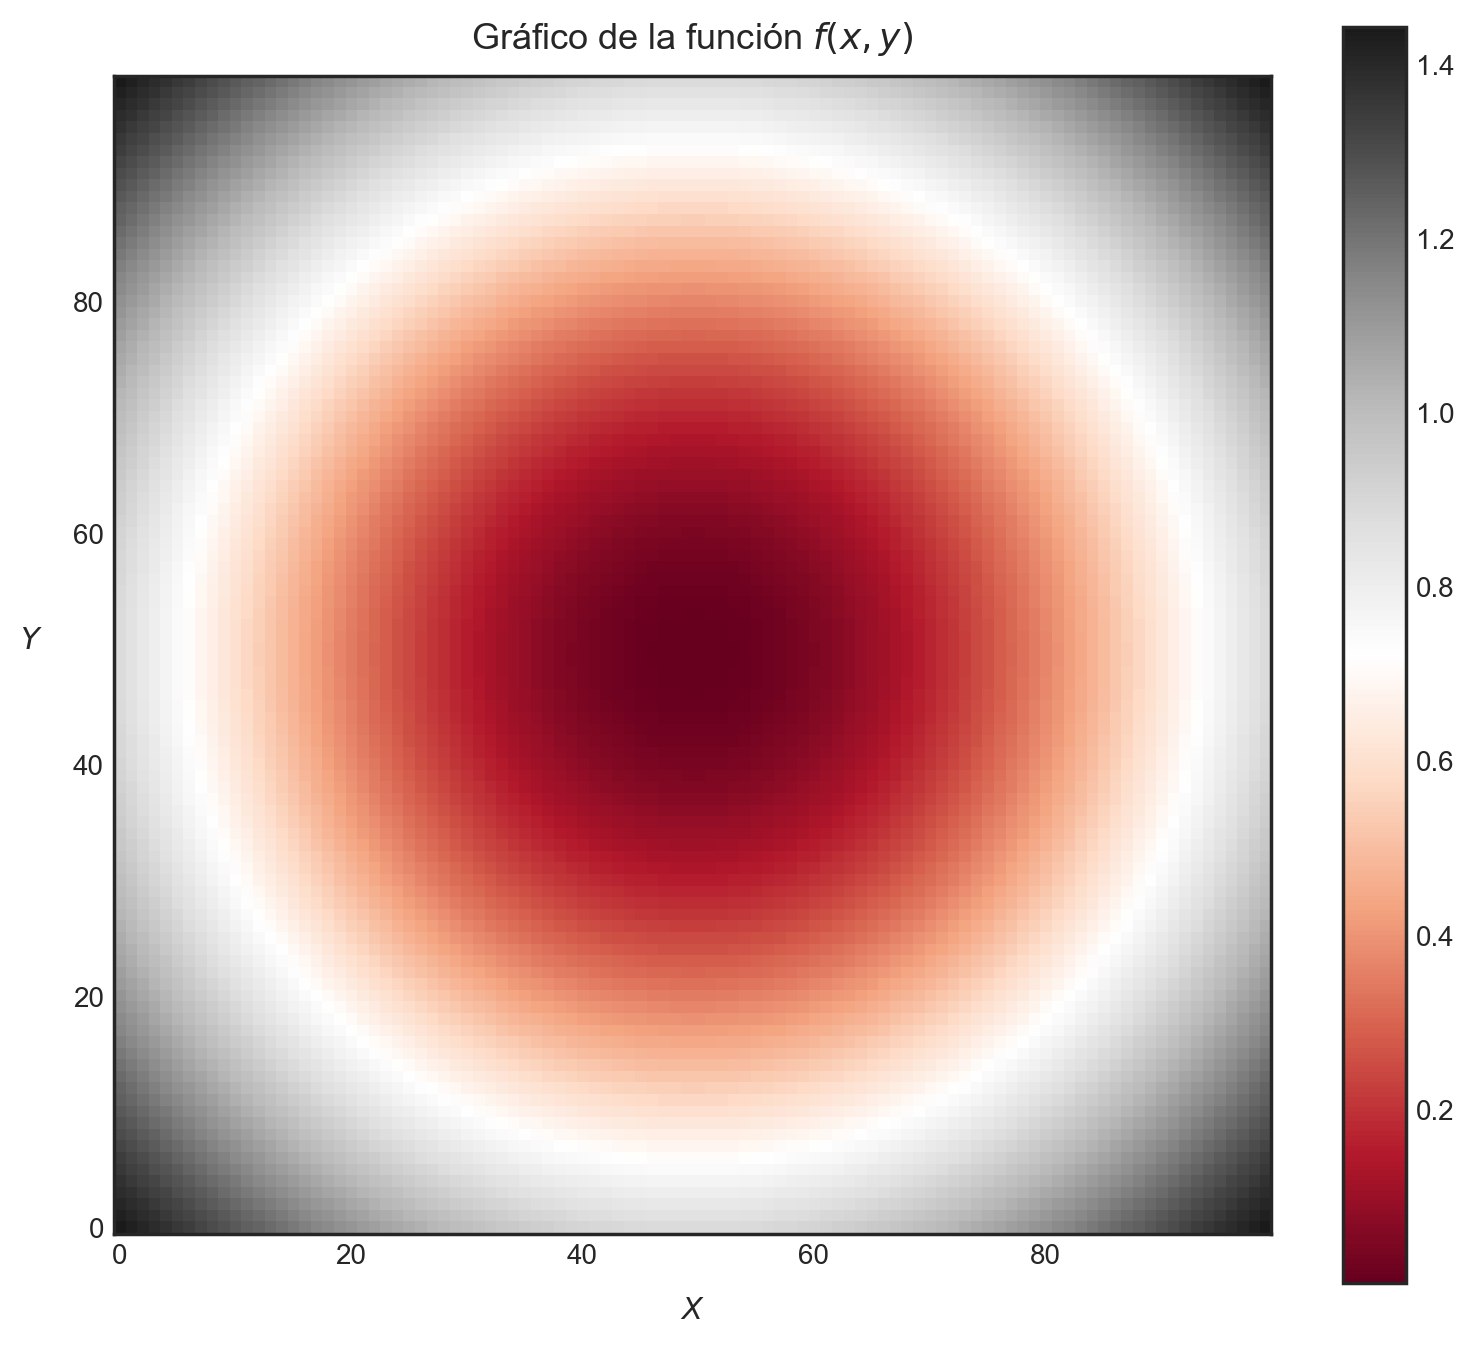

In [27]:
# Gráfico de nuestra función.
plt.figure(figsize=(8, 7))
plt.imshow(Z, origin="lower", cmap="RdGy")
plt.title(r"Gráfico de la función $f(x, y)$", fontsize=13, pad=10)
plt.xlabel(r"$X$", labelpad=10, fontsize=11)
plt.ylabel(r"$Y$", labelpad=15, fontsize=11, rotation=0)
plt.colorbar()
plt.tight_layout();

◼︎

**Ejemplo 3.5 – Escalamiento de un conjunto de datos:** Un error muy común en la construcción de modelos de regresión lineal clásicos guarda relación con la no consideración de las unidades de medición inherentes a los atributos que son representados por la data. Por ejemplo, es común que, en una planta concentradora, se construyan modelos descriptivos de las relaciones existentes entre tratamiento de molienda, presión de alimentación a la batería de hidrociclones y tamaño de producto en la salida del circuito de molienda, ya que es importante controlar este último parámetro, siendo esencial en el entendimiento de la calidad del producto de este proceso.

En general, el tratamiento de molienda suele expresarse como la capacidad de procesamiento de mineral de un molino SAG. De este modo, un circuito cuyo tratamiento es igual a 1500 tph es capaz de procesar 36.000 toneladas por día de mineral (en promedio). Este es un número muy grande si lo comparamos con la presión con la cual trabaja una batería de hidrociclones, que suele moverse entre 5 y 9 psi. Y más grande aún cuando lo comparamos con el tamaño de producto de molienda. En una planta típica, dicho tamaño suele expresarse como un porcentaje de mineral retenido por la malla #100 (con referencia a la serie de Tyler), y que puede variar entre 14% a 28%.

Por esa razón, al construir un modelo de regresión, es importante considerar estas magnitudes, ya que cambios muy pequeños en el tratamiento de molienda pueden inducir cambios enormes en la calidad del producto que sale del circuito.

Una forma de reducir el efecto de estos cambios enormes en la variabilidad entre atributos de un conjunto de datos corresponde al proceso de escalamiento. Tal proceso permite estandarizar cada una de las columnas que pueblan el dataset, de tal forma que dispongamos de información cuyas magnitudes sean similares entre sí antes de aplicar cualquier estimador. 

Un proceso de escalamiento común corresponde a la normalización. Consiste en transformar cada columna asociada a una variable en un dataset de tal forma que la distribución observada de estos datos, una vez realizada dicha transformación, tenga media nula y sea aproximadamente normal. Es decir, si un conjunto de datos tiene un total de $N$ observaciones (filas) y $D$ atributos o variables (columnas), entonces cada variable $X_{j}$ (para $1\leq j\leq D$) se somete a la transformación

<p style="text-align: center;">$Z_{j}={\displaystyle \frac{X_{j}-\bar{X}_{j} }{s_{j}}}$</p>

Donde $\bar{X}_{j}$ es la media de todas las observaciones relativas a la variable $X_{j}$ y $s_{j}$ su desviación estándar ($j=1,...,D$). Las variables $Z_{1},...,Z_{D}$ así definidas tendrán todas una distribución normal con media aproximadamente nula y desviación estándar igual a 1.

En **Numpy**, normalizar un conjunto de datos representado por un arreglo es sencillo gracias a las reglas de broadcasting. Supongamos que el arreglo `T` contiene información de una prueba de laboratorio que se realizó sobre 10 muestras de mineral en un circuito de molienda, de manera tal que la primera columna representa el tratamiento de molienda, la segunda columna representa la presión de alimentación de la batería de hidrociclones del circuito, y la tercera columna representa el porcentaje de mineral retenido con respecto a la malla #100:

In [28]:
# Definimos las variables que poblarán nuestro arreglo por separado.
t = np.array([1280.98, 1871.11, 1556.39, 1291.01, 1335.52, 1610.04, 1892.44, 1042.19, 1123.21, 1902.11]) # Tratamiento.
p = np.array([6.5, 5.6, 8.6, 8.8, 9.0, 5.8, 7.7, 7.0, 6.5, 6.4]) # Presiones.
g = np.array([24.1, 21.3, 20.6, 22.3, 18.9, 19.9, 21.2, 19.0, 20.9, 24.5]) # Tamaños de producto.

In [29]:
# Concatenamos toda esta información en un único arreglo.
T = np.vstack([t, p, g]).T # Transponemos para ordenar todo conforme el par (t, p, g).
print(T)

[[1280.98    6.5    24.1 ]
 [1871.11    5.6    21.3 ]
 [1556.39    8.6    20.6 ]
 [1291.01    8.8    22.3 ]
 [1335.52    9.     18.9 ]
 [1610.04    5.8    19.9 ]
 [1892.44    7.7    21.2 ]
 [1042.19    7.     19.  ]
 [1123.21    6.5    20.9 ]
 [1902.11    6.4    24.5 ]]


Para aplicar el escalamiento previamente definido, podemos calcular la media y la desviación estándar aplicando los métodos `mean()` y `std()`, respectivamente, sobre el arreglo `T`. Estas operaciones son ejemplos de lo que, en **Numpy**, se conoce como operaciones de agregación, ya que permiten obtener resultados agregados conforme la operación se realice a lo largo del eje 0, 1, 2, etc., mediante el uso del argumento `axis`. Por lo tanto, debido a que la normalización previamente definida se realiza por columna, los cálculos de la media y desviación estándar se hacen por columnas; es decir, conforme el eje 0. De esta manera, tenemos:

In [30]:
# Normalización.
Z = (T - T.mean(axis=0)) / T.std(axis=0)
print(Z)

[[-0.68408104 -0.57925954  1.56401339]
 [ 1.24268846 -1.33481547  0.01657965]
 [ 0.2151303   1.18370428 -0.37027879]
 [-0.65133318  1.3516056   0.56923455]
 [-0.5060084   1.51950691 -1.30979213]
 [ 0.3902971  -1.16691415 -0.75713722]
 [ 1.31233073  0.42814836 -0.03868584]
 [-1.46372839 -0.15950625 -1.25452664]
 [-1.19919877 -0.57925954 -0.20448232]
 [ 1.3439032  -0.6632102   1.78507535]]


Nuestro arreglo `Z` normalizado tiene media aproximadamente nula y desviación estándar unitaria. En efecto,

In [32]:
# Media del arreglo Z es aproximadamente nula.
Z.mean(axis=0)

array([ 0.00000000e+00, -2.77555756e-16, -1.73194792e-15])

In [33]:
# La desviación estándar es unitaria.
Z.std(axis=0)

array([1., 1., 1.])

◼︎

## Operaciones de agregación
Los ejemplos que hemos visto hasta ahora han involucrado la manipulación de arreglos muy pequeños. Las operaciones que hemos aprendido aplican para arreglos del tamaño que deseemos, pero es bueno establecer que la mayoría de las operaciones en **Numpy** pueden realizarse conforme un cierto eje de un arreglo respectivo, mediante el uso del argumento `axis`, obteniendo resultados agregados por filas, columnas, sub-arreglos, etc. Toda operación que permita su ejecución conforme un eje de un arreglo se denomina operación de agregación.
Veremos algunos ejemplos de este tipo de operaciones.

**Ejemplo 3.6 – Sumas y productos agregados:** Los métodos `sum()` y `prod()` permiten sumar o multiplicar elementos de un arreglo. Cuando las aplicamos sin ningún argumento, el resultado es conforme absolutamente todos los elementos que pueblan el arreglo respectivo. Sin embargo, podemos utilizar estos métodos para obtener las sumas o productos de los elementos de un arreglo conforme un determinado eje del mismo:

In [34]:
# Definición de un arreglo bidimensional A.
rng = np.random.default_rng(8)
A = rng.integers(low=1, high=10, size=(5, 10))
print(A)

[[7 3 3 9 2 3 6 8 6 8]
 [1 4 6 4 4 4 1 1 5 5]
 [9 3 8 3 2 2 4 2 9 8]
 [8 4 1 3 5 6 5 6 4 6]
 [1 9 5 2 8 4 8 3 9 1]]


In [35]:
# Suma por filas.
A.sum(axis=1)

array([55, 35, 50, 48, 50])

In [36]:
# Suma por columnas.
A.sum(axis=0)

array([26, 23, 23, 21, 21, 19, 24, 20, 33, 28])

In [37]:
# Multiplicación por filas.
A.prod(axis=1)

array([7838208,   38400, 1492992, 2073600,  622080])

In [38]:
# Multiplicación por columnas.
A.prod(axis=0)

array([ 504, 1296,  720,  648,  640,  576,  960,  288, 9720, 1920])

◼︎

**Ejemplo 3.7 – Sumas acumuladas en arreglos:** Una operación que es utilizada con frecuencia en el análisis de datos corresponde a la suma acumulada de valores conforme una secuencia de los mismos. Esto es común en la construcción (manual) de histogramas, a fin de verificar las correspondientes frecuencias absolutas o relativas acumuladas. En **Numpy**, esto puede conseguirse fácilmente mediante el uso del método `cumsum()`, el cual se aplica sobre el arreglo de interés. La suma acumulada también es una operación agregada:

In [39]:
# Suma acumulada en la dirección de las filas (eje 1).
A.cumsum(axis=1)

array([[ 7, 10, 13, 22, 24, 27, 33, 41, 47, 55],
       [ 1,  5, 11, 15, 19, 23, 24, 25, 30, 35],
       [ 9, 12, 20, 23, 25, 27, 31, 33, 42, 50],
       [ 8, 12, 13, 16, 21, 27, 32, 38, 42, 48],
       [ 1, 10, 15, 17, 25, 29, 37, 40, 49, 50]])

In [40]:
# Suma acumulada en la dirección de las columnas (eje 0).
A.cumsum(axis=0)

array([[ 7,  3,  3,  9,  2,  3,  6,  8,  6,  8],
       [ 8,  7,  9, 13,  6,  7,  7,  9, 11, 13],
       [17, 10, 17, 16,  8,  9, 11, 11, 20, 21],
       [25, 14, 18, 19, 13, 15, 16, 17, 24, 27],
       [26, 23, 23, 21, 21, 19, 24, 20, 33, 28]])

**Ejemplo 3.8 – Media y desviación estándar:** En el **Ejemplo 3.5** ya revisamos como calcular medias y desviaciones estándar en forma agregada sobre arreglos de **Numpy**, pero no está demás explicitarlo nuevamente:

In [41]:
# Media por filas.
A.mean(axis=1)

array([5.5, 3.5, 5. , 4.8, 5. ])

In [42]:
# Desviación estándar por columnas.
A.std(axis=0)

array([3.48711915, 2.24499443, 2.41660919, 2.48193473, 2.22710575,
       1.32664992, 2.31516738, 2.60768096, 2.05912603, 2.57681975])

In [43]:
# Coeficiente de variación por columnas.
A.std(axis=0) / A.mean(axis=0)

array([0.67059984, 0.48804227, 0.52534982, 0.59093684, 0.53026327,
       0.3491184 , 0.48232654, 0.65192024, 0.31198879, 0.46014638])

◼︎

**Ejemplo 3.9 – Valores máximos y mínimos:** Otra operación que es muy utilizada en el análisis de datos corresponde a la determinación de los valores máximos y mínimos en un arreglo, ya sea en el arreglo completo (sin la especificación, por tanto, del eje respecto del cual realizamos la búsqueda), o bien, conforme una de sus direcciones (por ejemplo, por filas y/o columnas en un arreglo bidimensional). Las funciones que permiten determinar estos valores son `np.max()` y `np.min()`, respectivamente, siendo también funciones de agregación:

In [44]:
# Valor máximo por filas.
A.max(axis=0)

array([9, 9, 8, 9, 8, 6, 8, 8, 9, 8])

In [45]:
# Valor mínimo por columnas.
A.min(axis=1)

array([2, 1, 2, 1, 1])

Con frecuencia, nos interesa conocer las posiciones relativas de los valores máximos y mínimos en ciertos ejes de un arreglo. Para ello, podemos usar las funciones `np.argmax()` y `np.argmin()`, que también permiten obtener resultados agregados:

In [46]:
# Posiciones asociada al elemento que es el máximo valor por filas de A.
A.argmax(axis=0)

array([2, 4, 2, 0, 4, 3, 4, 0, 2, 0])

In [47]:
# Posiciones asociada al elemento que es el mínimo valor por columnas de A.
A.argmin(axis=1)

array([4, 0, 4, 2, 0])

**Numpy** nos provee de muchas otras funciones de agregación, pero no las discutiremos en detalle aquí. Adicionalmente, la mayoría de estas funciones tienen versiones que permiten operar en arreglos que contengan NaNs (recordemos que NaN –o `np.nan`– en la terminología de **Numpy**, es un valor que no es numérico), debido a que NaN es un elemento que podemos denominar como absorbente, debido a que cualquier operación aritmética que involucre NaNs dará como resultado, en general, otro NaN.

Además, los métodos que hemos revisado en esta sección tienen todos su versión en formato de `ufunc`. Estos se observan en la Tabla (3.1).

<p style="text-align: center;">Tabla (3.1): Algunas funciones de agregación en Numpy</p>

| Función         | Versión a prueba de `nan` | Descripción                                                  |
| --------------- | ------------------------- | ------------------------------------------------------------ |
| `np.sum()`      | `np.nansum()`             | Calcula la suma de los elementos respectivos.                |
| `np.prod()`     | `np.nanprod()`            | Calcula el producto de los elementos respectivos.            |
| `np.mean()`     | `np.nanmean()`            | Calcula la media de los elementos respectivos.               |
| `np.std()`      | `np.nanstd()`             | Calcula la desviación estándar de los elementos respectivos. |
| `np.var()`      | `np.nanvar()`             | Calcula la varianza de los elementos respectivos             |
| `np.min()`      | `np.nanmin()`             | Halla el valor mínimo.                                       |
| `np.max()`      | `np.nanmax()`             | Halla el valor máximo.                                       |
| `np.argmin()`   | `np.nanargmin()`          | Halla la posición del valor mínimo.                          |
| `np.argmax()`   | `np.nanargmax()`          | Halla la posición del valor máximo.                          |
| `np.median()`   | `np.nanmedian()`          | Calcula la mediana de los elementos respectivos.             |

## Comentarios finales.
Las herramientas que hemos desarrollado en esta sección nos permiten generar cálculos de toda índole mediante el uso de funciones de agregación, tomando como referencia los ejes estructurales de un arreglo en cada caso. De esta manera, ya disponemos de una robusta caja de herramientas con la cual podemos trabajar eficientemente usando como base arreglos de **Numpy**.

En la siguiente sección, abordaremos las últimas herramientas fundamentales que veremos para esta librería en la asignatura, y que son relativas a la operación con datos de tipo Booleano, además del uso de `ufuncs` que dan como resultado arreglos con este tipo de elementos, las que nos permitirán establecer comparaciones y ordenamientos específicos de datos en un arreglo.